In [1]:
## import relevant packages
import pandas as pd
import urllib.request as urllib
import requests
from bs4 import BeautifulSoup
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
## webscraping cell

## make dataframes to be filled
season = []
week = []
team1 = []
team2 = []
manager1 = []
manager2 = []
team1score = []
team2score = []
team1record = []
team2record = []
team1streak = []
team2streak = []
team1place = []
team2place = []
team1win = []
team2win = []

## url setup
site1 = 'https://fantasy.nfl.com/league/2461806/history/'
site2 = '/schedule?gameSeason='
site3 = '&leagueId=2461806&scheduleDetail='
site4 = '&scheduleType=week&standingsTab=schedule'
## loop from 2014 to 2020, weeks 1 to 16
for i in range(2014,2021):
    for y in range(1,17):
        year = str(i)
        week_num = str(y)
        
        ## create soup object for every week of every season
        site = site1 + year + site2 + year + site3 + week_num + site4 
        html = urllib.urlopen(site)
        soup = BeautifulSoup(html.read())
        
        ## isolate html containing matchup data
        li_tags = soup.find_all("li",{"class": "matchup"})
        for x in li_tags:
            teamNames = x.find_all("a",{"class": "teamName"})
            names = x.find_all("li",{"class": "name"})
            scores = x.find_all("div",{"class": "teamTotal"})
            records = x.find_all("span",{"class": "teamRecord"})
            streak = x.find_all("li",{"class": "streak"})
            places = x.find_all("span",{"class": "teamRank"})
            
            season.append(i)
            week.append(y)
        
            team1.append(teamNames[0].get_text())
            team2.append(teamNames[1].get_text())
        
            manager1.append(names[0].get_text())
            manager2.append(names[1].get_text())
       
            team1score.append(scores[0].get_text())
            team2score.append(scores[1].get_text())
        
            team1record.append(records[0].get_text())
            team2record.append(records[1].get_text())
        
            team1streak.append(streak[0].get_text().split()[2])
            team2streak.append(streak[1].get_text().split()[2])
       
            team1place.append(places[0].get_text().replace("(","").replace(")",""))
            team2place.append(places[1].get_text().replace("(","").replace(")",""))
            
            ## if team 1 scored more than team 2, then team 1 won the game
            if float(scores[0].get_text()) > float(scores[1].get_text()):
                team1win.append(1);
                team2win.append(0);
            else:
                team1win.append(0);
                team2win.append(1);


In [3]:
## create main dataframe
df = pd.DataFrame()
df["Season"] = season
df["Week"] = week
df["Team_1"] = team1
df["Team_2"] = team2
df["Manager_1"] = manager1
df["Manager_2"] = manager2
df["Team_1_Score"] = team1score
df["Team_1_Score"] = df["Team_1_Score"].astype(float)
df["Team_2_Score"] = team2score
df["Team_2_Score"] = df["Team_2_Score"].astype(float)
df["Margin"] = abs(df["Team_1_Score"] - df["Team_2_Score"])
df["Sum"] = df["Team_1_Score"] + df["Team_2_Score"]
df["Team_1_Streak"] = team1streak
df["Team_2_Streak"] = team2streak
df["Team_1_Record"] = team1record
df["Team_2_Record"] = team2record
df["Team_1_Place"] = team1place
df["Team_1_Place"] = df["Team_1_Place"].astype(float)
df["Team_2_Place"] = team2place
df["Team_2_Place"] = df["Team_2_Place"].astype(float)
df["Team_1_Win"] = team1win
df["Team_2_Win"] = team2win
df["Season_Week"] = df["Season"].astype(str) + " " + df["Week"].astype(str)

In [4]:
df

,Season,Week,Team_1,Team_2,Manager_1,Manager_2,Team_1_Score,Team_2_Score,Margin,Sum,Team_1_Streak,Team_2_Streak,Team_1_Record,Team_2_Record,Team_1_Place,Team_2_Place,Team_1_Win,Team_2_Win,Season_Week
0,2014,1,Number Juan,Belichick Yourself,Mikey,Chris,390.70,491.70,101.00,882.40,L1,W1,0-1-0,1-0-0,8.0,3.0,0,1,2014 1
1,2014,1,The great ones,French Toast Mafia,Scott,Ankith,512.90,443.20,69.70,956.10,W1,L1,1-0-0,0-1-0,2.0,6.0,1,0,2014 1
2,2014,1,Hernandez Hit Men,Mr star,Joe,John,454.50,578.00,123.50,1032.50,L1,W1,0-1-0,1-0-0,5.0,1.0,0,1,2014 1
3,2014,1,Thack to the future,Come At Me,Ayush,Krishanu,415.00,397.80,17.20,812.80,W1,L1,1-0-0,0-1-0,4.0,7.0,1,0,2014 1
4,2014,2,The great ones,Number Juan,Scott,Mikey,446.30,482.70,36.40,929.00,L1,W1,1-1-0,1-1-0,6.0,3.0,0,1,2014 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2020,16,4-0 Dream,Bok Choy Babes,Ankith,Zach,83.02,126.02,43.00,209.04,L3,L2,3-10-0,6-7-0,11.0,9.0,0,1,2020 16
598,2020,16,Dreams are For Idiots,Ishaan,Scott,Ishaan,128.68,103.54,25.14,232.22,W1,L2,5-8-0,3-10-0,10.0,12.0,1,0,2020 16
599,2020,16,The Wang Gang,Aint Talkin' Bout Chubb,Steve,"Alex, Davis",103.78,79.44,24.34,183.22,L1,W2,7-6-0,8-5-0,5.0,3.0,1,0,2020 16
600,2020,16,Showtyme,C9H13NO3,Nandha,Ayush,130.42,114.82,15.60,245.24,W2,W2,10-3-0,8-5-0,1.0,2.0,1,0,2020 16


In [5]:
## create inverse dataframe, swapping team 1 and team 2 data
swap = pd.DataFrame()
swap["Season"] = season
swap["Week"] = week
swap["Team_1"] = team2
swap["Team_2"] = team1
swap["Manager_1"] = manager2
swap["Manager_2"] = manager1
swap["Team_1_Score"] = team2score
swap["Team_1_Score"] = swap["Team_1_Score"].astype(float)
swap["Team_2_Score"] = team1score
swap["Team_2_Score"] = swap["Team_2_Score"].astype(float)
swap["Team_1_Streak"] = team2streak
swap["Team_2_Streak"] = team1streak
swap["Team_1_Record"] = team2record
swap["Team_2_Record"] = team1record
swap["Team_1_Place"] = team2place
swap["Team_1_Place"] = swap["Team_1_Place"].astype(float)
swap["Team_2_Place"] = team1place
swap["Team_2_Place"] = swap["Team_2_Place"].astype(float)
swap["Team_1_Win"] = team2win
swap["Team_2_Win"] = team1win
swap["Season_Week"] = swap["Season"].astype(str) + " " + swap["Week"].astype(str)
swap["Margin"] = abs(swap["Team_1_Score"] - swap["Team_2_Score"])
swap["Sum"] = swap["Team_1_Score"] + swap["Team_2_Score"]

In [6]:
## double has all games twice, once with team 1 as team 1 and once with team 2 as team 1
double = df.append(swap)
## standard df of all years we have used standard scoring and positions
standard_df = df[(df["Season"] == 2020) | (df["Season"] == 2017)  | (df["Season"] == 2018) | (df["Season"] == 2019) | (df["Season"] == 2016)]
standard_double = double[(double["Season"] == 2020) |(double["Season"] == 2017)  | (double["Season"] == 2018) | (double["Season"] == 2019) | (double["Season"] == 2016)]
## df of regular season matchups
regular_season = double[(double["Week"] != 16)  & (double["Week"] != 15) & (double["Week"] != 14)]
## regular season standard 
standard_regular = standard_double[(standard_double["Week"] != 16)  & (standard_double["Week"] != 15) & (standard_double["Week"] != 14)]
##standard_regular["Week Before"] = standard_double[]

In [7]:
## dataframes of a manager's games
krish = double[(double["Manager_1"] == "Krishanu")]
ayush = double[(double["Manager_1"] == "Ayush")]
nandha = double[(double["Manager_1"] == "Nandha")]

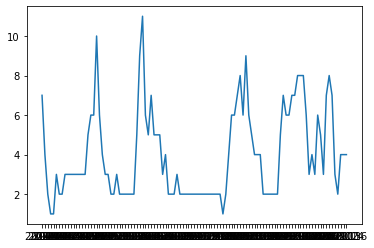

In [7]:
## plot of krishanu's relative rank over time
import matplotlib.pyplot as plt
krish = krish.sort_values(by=["Season", "Week"])
ayush = ayush.sort_values(by=["Season", "Week"])
nandha = nandha.sort_values(by=["Season", "Week"])
plt.plot(krish["Season_Week"],krish["Team_1_Place"].astype(int))

In [8]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
standard_regular.groupby(["Manager_1", "Team_1_Place"]).count().sort_values("Season", ascending=False)
standard_regular[standard_regular["Team_1_Place"] == 1].groupby("Manager_1").count().sort_values("Season", ascending=False)

,Season,Week,Team_1,Team_2,Manager_2,Team_1_Score,Team_2_Score,Margin,Sum,Team_1_Streak,Team_2_Streak,Team_1_Record,Team_2_Record,Team_1_Place,Team_2_Place,Team_1_Win,Team_2_Win,Season_Week
Manager_1,,,,,,,,,,,,,,,,,,
Ankith,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
"Chris, Kanish",13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
Steve,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Nandha,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Ayush,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Ishaan,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
"Alex, Davis",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Joe,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Krishanu,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


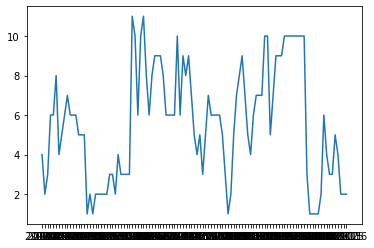

In [9]:
## plot of ayush's relative rank over time
plt.plot(ayush["Season_Week"],ayush["Team_1_Place"].astype(int))

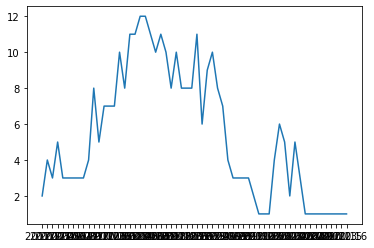

In [10]:
plt.plot(nandha["Season_Week"],nandha["Team_1_Place"].astype(int))

In [11]:
## longest losing streaks (exlcuding double digit streaks)
regular_season[regular_season["Team_1_Win"] == 0].sort_values("Team_1_Streak", ascending=False).head(20)

,Season,Week,Team_1,Team_2,Manager_1,Manager_2,Team_1_Score,Team_2_Score,Margin,Sum,Team_1_Streak,Team_2_Streak,Team_1_Record,Team_2_Record,Team_1_Place,Team_2_Place,Team_1_Win,Team_2_Win,Season_Week
48,2014,13,Number Juan,Mr star,Mikey,John,471.60,526.10,54.50,997.70,L9,W1,2-11-0,9-4-0,8.0,2.0,0,1,2014 13
486,2019,12,Ishaan,Belichick Yourself,Ishaan,"Chris, Kanish",85.88,98.62,12.74,184.50,L8,W1,1-11-0,10-2-0,12.0,1.0,0,1,2019 12
394,2018,12,Hernandez Hit Men,Ishaan,Joe,Ishaan,66.58,100.52,33.94,167.10,L8,W3,1-11-0,7-5-0,12.0,4.0,0,1,2018 12
44,2014,12,Number Juan,Come At Me,Mikey,Krishanu,404.90,423.50,18.60,828.40,L8,W1,2-10-0,7-5-0,8.0,3.0,0,1,2014 12
468,2019,9,No Place Like Mahomes,Showtime,Ankith,Nandha,46.70,90.38,43.68,137.08,L8,W5,1-8-0,6-3-0,11.0,3.0,0,1,2019 9
389,2018,11,Hernandez Hit Men,Bok Choy Babes,Joe,Zach,99.04,99.04,0.00,198.08,L7,W1,1-10-0,5-6-0,12.0,9.0,0,1,2018 11
480,2019,11,Ishaan,Nasty,Ishaan,Krishanu,75.42,96.12,20.70,171.54,L7,W1,1-10-0,6-5-0,12.0,7.0,0,1,2019 11
463,2019,8,No Place Like Mahomes,Bok Choy Babes,Ankith,Zach,54.60,138.34,83.74,192.94,L7,W1,1-7-0,4-4-0,11.0,5.0,0,1,2019 8
40,2014,11,Number Juan,Thack to the future,Mikey,Ayush,389.80,470.30,80.50,860.10,L7,W1,2-9-0,4-7-0,8.0,6.0,0,1,2014 11
273,2017,7,Ishaan,Thack Attack,Ishaan,Ayush,68.52,77.12,8.60,145.64,L7,W2,0-7-0,4-3-0,12.0,5.0,0,1,2017 7


In [12]:
## longest winning streaks (exlcuding double digit streaks)
regular_season[regular_season["Team_1_Win"] == 1].sort_values("Team_1_Streak", ascending=False).head(16)

,Season,Week,Team_1,Team_2,Manager_1,Manager_2,Team_1_Score,Team_2_Score,Margin,Sum,Team_1_Streak,Team_2_Streak,Team_1_Record,Team_2_Record,Team_1_Place,Team_2_Place,Team_1_Win,Team_2_Win,Season_Week
284,2017,9,HUNTing for Ws,Nandhathebeast,Ankith,Nandha,90.16,83.06,7.10,173.22,W9,L2,9-0-0,5-4-0,1.0,3.0,1,0,2017 9
495,2019,13,Showtime,Belichick Yourself,Nandha,"Chris, Kanish",91.34,84.64,6.70,175.98,W9,L1,10-3-0,10-3-0,1.0,2.0,1,0,2019 13
488,2019,12,Showtime,Vance Make Them Dance,Nandha,Scott,73.88,73.28,0.60,147.16,W8,L4,9-3-0,5-7-0,2.0,9.0,1,0,2019 12
460,2019,8,Belichick Yourself,Number Juan,"Chris, Kanish",Mikey,110.48,87.84,22.64,198.32,W8,L1,8-0-0,4-4-0,1.0,6.0,1,0,2019 8
478,2019,11,The Wang Gang,Vance Make Them Dance,Steve,Scott,95.78,87.14,8.64,182.92,W8,L3,9-2-0,5-6-0,2.0,8.0,1,0,2019 11
277,2017,8,HUNTing for Ws,Star,Ankith,Alex,78.44,65.50,12.94,143.94,W8,L4,8-0-0,2-6-0,1.0,11.0,1,0,2017 8
270,2017,7,HUNTing for Ws,Number Juan,Ankith,Mikey,84.72,81.26,3.46,165.98,W7,L4,7-0-0,2-5-0,1.0,11.0,1,0,2017 7
458,2019,7,Belichick Yourself,Ishaan,"Chris, Kanish",Ishaan,95.44,86.22,9.22,181.66,W7,L3,7-0-0,1-6-0,1.0,12.0,1,0,2019 7
479,2019,11,Showtime,Belichick Yourself,Nandha,"Chris, Kanish",134.36,87.92,46.44,222.28,W7,L1,8-3-0,9-2-0,3.0,1.0,1,0,2019 11
477,2019,10,The Wang Gang,Nasty,Steve,Krishanu,119.76,79.06,40.70,198.82,W7,L1,8-2-0,5-5-0,2.0,6.0,1,0,2019 10


In [13]:
## number of games over 100 points
##standard_double[standard_double["Team_1_Score"] > 100].groupby("Manager_1").count()["Season"] / standard_double.groupby("Manager_1").count()["Season"]
double[double["Team_1_Score"] > 100].groupby("Manager_1").count()["Season"] / double.groupby("Manager_1").count()["Season"]
##standard_double[standard_double["Team_1_Score"] > 120].groupby("Manager_1").count()["Season"]

Manager_1
Alex             0.543478
Alex, Davis      0.510638
Ankith           0.495413
Ayush            0.596330
Chris            0.729167
Chris, Kanish    0.377049
Ishaan           0.298701
Joe              0.570093
John             0.937500
Kanish           0.133333
Krishanu         0.626168
Mikey            0.614679
Nandha           0.433333
Scott            0.546296
Steve            0.545455
Zach             0.445652
Name: Season, dtype: float64

In [14]:
double[double["Team_1_Score"] > 120].groupby("Manager_1").count()["Season"]

Manager_1
Alex             12
Alex, Davis      13
Ankith           37
Ayush            39
Chris            29
Chris, Kanish    12
Ishaan            6
Joe              31
John             29
Kanish            1
Krishanu         45
Mikey            44
Nandha           15
Scott            43
Steve            11
Zach             16
Name: Season, dtype: int64

In [22]:
standard_double.sort_values("Team_1_Score", ascending=True).head(15)

,Season,Week,Team_1,Team_2,Manager_1,Manager_2,Team_1_Score,Team_2_Score,Margin,Sum,Team_1_Streak,Team_2_Streak,Team_1_Record,Team_2_Record,Team_1_Place,Team_2_Place,Team_1_Win,Team_2_Win,Season_Week
233,2016,16,Ishaan,Star,Ishaan,Alex,4.30,102.38,98.08,106.68,L1,W1,7-6-0,7-6-0,4.0,3.0,0,1,2016 16
290,2017,10,Belichick Yourself,Bok Choy Babes,"Chris, Kanish",Zach,22.20,99.58,77.38,121.78,L1,W1,4-6-0,5-5-0,10.0,5.0,0,1,2017 10
567,2020,10,Ishaan,4-0 Dream,Ishaan,Ankith,22.88,117.78,94.90,140.66,L6,W1,2-8-0,3-7-0,12.0,10.0,0,1,2020 10
221,2016,14,kanigga,Number Juan,Kanish,Mikey,37.98,118.40,80.42,156.38,L2,L1,4-9-0,6-7-0,12.0,9.0,0,1,2016 14
358,2018,6,Thack Attack,Bok Choy Babes,Ayush,Zach,42.98,86.10,43.12,129.08,L3,W1,3-3-0,2-4-0,7.0,10.0,0,1,2018 6
215,2016,13,Hernandez Hit Men,Belichick Yourself,Joe,Chris,43.92,93.96,50.04,137.88,L2,W1,7-6-0,7-6-0,7.0,5.0,0,1,2016 13
468,2019,9,No Place Like Mahomes,Showtime,Ankith,Nandha,46.70,90.38,43.68,137.08,L8,W5,1-8-0,6-3-0,11.0,3.0,0,1,2019 9
182,2016,7,kanigga,Hernandez Hit Men,Kanish,Joe,47.50,75.86,28.36,123.36,L1,W4,3-4-0,5-2-0,10.0,2.0,0,1,2016 7
314,2017,14,Number Juan,Jewish Blood,Mikey,Scott,47.52,80.64,33.12,128.16,L1,W1,7-6-0,7-6-0,4.0,5.0,0,1,2017 14
160,2016,4,Thack Attack,Number Juan,Ayush,Mikey,48.16,127.16,79.00,175.32,L1,W2,2-2-0,2-2-0,10.0,5.0,0,1,2016 4


In [ ]:
standard_double.sort_values("Team_1_Score", ascending=True).head(15)

In [16]:
standard_df.sort_values("Margin", ascending=True).head(15)

,Season,Week,Team_1,Team_2,Manager_1,Manager_2,Team_1_Score,Team_2_Score,Margin,Sum,Team_1_Streak,Team_2_Streak,Team_1_Record,Team_2_Record,Team_1_Place,Team_2_Place,Team_1_Win,Team_2_Win,Season_Week
389,2018,11,Hernandez Hit Men,Bok Choy Babes,Joe,Zach,99.04,99.04,0.00,198.08,L7,W1,1-10-0,5-6-0,12.0,9.0,0,1,2018 11
543,2020,6,Aint Talkin' Bout Chubb,The Wang Gang,"Alex, Davis",Steve,86.50,86.42,0.08,172.92,W2,L1,4-2-0,3-3-0,4.0,7.0,1,0,2020 6
179,2016,7,Asianfeickboys,The Wang Gang,Zach,Steve,78.20,78.28,0.08,156.48,L2,W4,4-3-0,6-1-0,5.0,1.0,0,1,2016 7
499,2019,14,The Wang Gang,Kittle 'Em All,Steve,"Alex, Davis",110.54,111.06,0.52,221.60,L2,L1,9-4-0,7-6-0,3.0,6.0,0,1,2019 14
267,2017,6,Hernandez Hit Men,Star,Joe,Alex,94.76,94.22,0.54,188.98,W1,L2,3-3-0,2-4-0,5.0,9.0,1,0,2017 6
285,2017,9,Belichick Yourself,The Wang Gang,"Chris, Kanish",Steve,94.72,94.14,0.58,188.86,W1,L3,4-5-0,4-5-0,10.0,9.0,1,0,2017 9
488,2019,12,Showtime,Vance Make Them Dance,Nandha,Scott,73.88,73.28,0.60,147.16,W8,L4,9-3-0,5-7-0,2.0,9.0,1,0,2019 12
544,2020,6,her,4-0 Dream,Krishanu,Ankith,96.44,95.68,0.76,192.12,W1,L2,4-2-0,2-4-0,5.0,10.0,1,0,2020 6
349,2018,4,Ishaan,Sony Are You OK,Ishaan,"Alex, Davis",150.78,149.96,0.82,300.74,W1,L2,2-2-0,1-3-0,5.0,8.0,1,0,2018 4
230,2016,16,Jewish Blood,kanigga,Scott,Kanish,83.30,84.18,0.88,167.48,W3,L2,6-7-0,4-9-0,10.0,12.0,0,1,2016 16


In [17]:
df.sort_values("Margin", ascending=False).head(15)

,Season,Week,Team_1,Team_2,Manager_1,Manager_2,Team_1_Score,Team_2_Score,Margin,Sum,Team_1_Streak,Team_2_Streak,Team_1_Record,Team_2_Record,Team_1_Place,Team_2_Place,Team_1_Win,Team_2_Win,Season_Week
63,2014,16,The great ones,Mr star,Scott,John,493.10,0.00,493.10,493.10,L1,W2,7-7-0,10-4-0,4.0,2.0,1,0,2014 16
36,2014,10,Hernandez Hit Men,Number Juan,Joe,Mikey,547.00,295.50,251.50,842.50,W2,L6,4-6-0,2-8-0,6.0,8.0,1,0,2014 10
11,2014,3,Mr star,French Toast Mafia,John,Ankith,456.50,233.30,223.20,689.80,W1,L3,2-1-0,0-3-0,5.0,8.0,1,0,2014 3
27,2014,7,Hernandez Hit Men,Thack to the future,Joe,Ayush,408.00,597.40,189.40,1005.40,L1,W1,2-5-0,3-4-0,6.0,4.0,0,1,2014 7
5,2014,2,Belichick Yourself,Hernandez Hit Men,Chris,Joe,560.80,398.70,162.10,959.50,W2,L2,2-0-0,0-2-0,1.0,8.0,1,0,2014 2
13,2014,4,Hernandez Hit Men,Come At Me,Joe,Krishanu,364.80,517.70,152.90,882.50,L1,W3,1-3-0,3-1-0,7.0,1.0,0,1,2014 4
49,2014,13,French Toast Mafia,Come At Me,Ankith,Krishanu,597.60,445.90,151.70,1043.50,W2,L1,6-7-0,7-6-0,5.0,3.0,1,0,2014 13
113,2015,10,Mr star,Come At Me,John,Krishanu,144.92,0.00,144.92,144.92,W3,L1,5-5-0,6-4-0,7.0,2.0,1,0,2015 10
53,2014,14,Mr star,Belichick Yourself,John,Chris,661.30,521.80,139.50,1183.10,W2,L1,10-4-0,11-3-0,2.0,1.0,1,0,2014 14
56,2014,15,Thack to the future,Number Juan,Ayush,Mikey,506.10,369.20,136.90,875.30,W1,W1,6-8-0,3-11-0,5.0,8.0,1,0,2014 15


In [23]:
df.sort_values("Sum", ascending=True).head(15)

,Season,Week,Team_1,Team_2,Manager_1,Manager_2,Team_1_Score,Team_2_Score,Margin,Sum,Team_1_Streak,Team_2_Streak,Team_1_Record,Team_2_Record,Team_1_Place,Team_2_Place,Team_1_Win,Team_2_Win,Season_Week
233,2016,16,Ishaan,Star,Ishaan,Alex,4.30,102.38,98.08,106.68,L1,W1,7-6-0,7-6-0,4.0,3.0,0,1,2016 16
195,2016,9,Hernandez Hit Men,Thack Attack,Joe,Ayush,61.80,56.46,5.34,118.26,W1,L2,6-3-0,4-5-0,3.0,9.0,1,0,2016 9
189,2016,8,Hernandez Hit Men,Jewish Blood,Joe,Scott,59.24,60.42,1.18,119.66,L1,W1,5-3-0,2-6-0,3.0,12.0,0,1,2016 8
204,2016,11,Jewish Blood,Star,Scott,Alex,67.82,53.12,14.70,120.94,W1,L1,4-7-0,6-5-0,12.0,4.0,1,0,2016 11
290,2017,10,Bok Choy Babes,Belichick Yourself,Zach,"Chris, Kanish",99.58,22.20,77.38,121.78,W1,L1,5-5-0,4-6-0,5.0,10.0,1,0,2017 10
182,2016,7,kanigga,Hernandez Hit Men,Kanish,Joe,47.50,75.86,28.36,123.36,L1,W4,3-4-0,5-2-0,10.0,2.0,0,1,2016 7
229,2016,16,Asianfeickboys,Touchdown Militia,Zach,Ankith,52.36,75.18,22.82,127.54,L1,W1,5-8-0,6-7-0,11.0,8.0,0,1,2016 16
314,2017,14,Number Juan,Jewish Blood,Mikey,Scott,47.52,80.64,33.12,128.16,L1,W1,7-6-0,7-6-0,4.0,5.0,0,1,2017 14
358,2018,6,Thack Attack,Bok Choy Babes,Ayush,Zach,42.98,86.10,43.12,129.08,L3,W1,3-3-0,2-4-0,7.0,10.0,0,1,2018 6
435,2019,3,Thack Attack,Ishaan,Ayush,Ishaan,73.54,59.22,14.32,132.76,W2,L3,2-1-0,0-3-0,5.0,12.0,1,0,2019 3


In [19]:
double[(double["Team_1_Place"] + double["Team_2_Place"] > (double["Team_1_Place"]))].groupby("Manager_1").count()["Season"]

Manager_1
Alex              46
Alex, Davis       47
Ankith           109
Ayush            109
Chris             48
Chris, Kanish     61
Ishaan            77
Joe              107
John              32
Kanish            15
Krishanu         107
Mikey            109
Nandha            60
Scott            108
Steve             77
Zach              92
Name: Season, dtype: int64

In [20]:
double[(double["Margin"] < 10) & (double["Team_1_Win"] == 1)].groupby("Manager_1").count()["Season"]

Manager_1
Alex              6
Alex, Davis       8
Ankith           18
Ayush             6
Chris             8
Chris, Kanish    12
Ishaan            8
Joe              10
John              1
Kanish            1
Krishanu         14
Mikey            10
Nandha           11
Scott             7
Steve            12
Zach             13
Name: Season, dtype: int64

In [8]:
## adding playoff tracker variable

## teams during final week of regular season
EOS = standard_regular[standard_regular["Week"] == 13]

## playoff teams determined by place
EOS_Playoff_Teams = EOS[EOS["Team_1_Place"] < 7].sort_values(["Team_1_Place", "Season"])[["Season","Team_1","Week"]]

## merge normal dataset with playoff teams
standard_regular = standard_regular.merge(EOS_Playoff_Teams, how='left', on=['Season', 'Team_1'])

## new column: 1 if it got merged to
standard_regular['playoff'] = np.where(standard_regular['Week_y'].isna(), 0, 1)

## tidying up
standard_regular = standard_regular.drop(columns=["Week_y"])
standard_regular = standard_regular.rename(columns={"Week_x" : "Week"})

In [9]:
standard_regular[standard_regular["Week"] == 10].groupby(["Team_1_Place", "playoff"]).count()

Season  Week  Team_1  Team_2  Manager_1  Manager_2  \
Team_1_Place playoff                                                       
1.0          1             5     5       5       5          5          5   
2.0          1             5     5       5       5          5          5   
3.0          1             5     5       5       5          5          5   
4.0          0             3     3       3       3          3          3   
             1             2     2       2       2          2          2   
5.0          0             1     1       1       1          1          1   
             1             4     4       4       4          4          4   
6.0          0             2     2       2       2          2          2   
             1             3     3       3       3          3          3   
7.0          0             1     1       1       1          1          1   
             1             4     4       4       4          4          4   
8.0          0             5     5       5       5          5          5   
9.0          0             3     3       3       3          3          3   
             1             2     2       2       2          2          2   
10.0         0             5     5       5       5          5          5   
11.0         0             5     5       5       5          5          5   
12.0         0             5     5       5       5          5          5   

                      Team_1_Score  Team_2_Score  Margin  Sum  Team_1_Streak  \
Team_1_Place playoff                                                           
1.0          1                   5             5       5    5              5   
2.0          1                   5             5       5    5              5   
3.0          1                   5             5       5    5              5   
4.0          0                   3             3       3    3              3   
             1                   2             2       2    2              2   
5.0          0                   1             1       1    1              1   
             1                   4             4       4    4              4   
6.0          0                   2             2       2    2              2   
             1                   3             3       3    3              3   
7.0          0                   1             1       1    1              1   
             1                   4             4       4    4              4   
8.0          0                   5             5       5    5              5   
9.0          0                   3             3       3    3              3   
             1                   2             2       2    2              2   
10.0         0                   5             5       5    5              5   
11.0         0                   5             5       5    5              5   
12.0         0                   5             5       5    5              5   

                      Team_2_Streak  Team_1_Record  Team_2_Record  \
Team_1_Place playoff                                                
1.0          1                    5              5              5   
2.0          1                    5              5              5   
3.0          1                    5              5              5   
4.0          0                    3              3              3   
             1                    2              2              2   
5.0          0                    1              1              1   
             1                    4              4              4   
6.0          0                    2              2              2   
             1                    3              3              3   
7.0          0                    1              1              1   
             1                    4              4              4   
8.0          0                    5              5              5   
9.0          0                    3              3              3   
             1       

In [10]:
standard_regular[standard_regular["Week"] == 10].groupby(["Team_1_Record", "playoff"]).count()

Season  Week  Team_1  Team_2  Manager_1  Manager_2  \
Team_1_Record playoff                                                       
1-9-0         0             2     2       2       2          2          2   
10-0-0        1             1     1       1       1          1          1   
2-8-0         0             3     3       3       3          3          3   
3-7-0         0             8     8       8       8          8          8   
4-6-0         0             6     6       6       6          6          6   
              1             2     2       2       2          2          2   
5-5-0         0             9     9       9       9          9          9   
              1             8     8       8       8          8          8   
6-4-0         0             2     2       2       2          2          2   
              1            12    12      12      12         12         12   
7-3-0         1             1     1       1       1          1          1   
8-2-0         1             4     4       4       4          4          4   
9-1-0         1             2     2       2       2          2          2   

                       Team_1_Score  Team_2_Score  Margin  Sum  Team_1_Streak  \
Team_1_Record playoff                                                           
1-9-0         0                   2             2       2    2              2   
10-0-0        1                   1             1       1    1              1   
2-8-0         0                   3             3       3    3              3   
3-7-0         0                   8             8       8    8              8   
4-6-0         0                   6             6       6    6              6   
              1                   2             2       2    2              2   
5-5-0         0                   9             9       9    9              9   
              1                   8             8       8    8              8   
6-4-0         0                   2             2       2    2              2   
              1                  12            12      12   12             12   
7-3-0         1                   1             1       1    1              1   
8-2-0         1                   4             4       4    4              4   
9-1-0         1                   2             2       2    2              2   

                       Team_2_Streak  Team_2_Record  Team_1_Place  \
Team_1_Record playoff                                               
1-9-0         0                    2              2             2   
10-0-0        1                    1              1             1   
2-8-0         0                    3              3             3   
3-7-0         0                    8              8             8   
4-6-0         0                    6              6             6   
              1                    2              2             2   
5-5-0         0                    9              9             9   
              1                    8              8             8   
6-4-0         0                    2              2             2   
              1                   12             12            12   
7-3-0         1                    1              1             1   
8-2-0         1                    4              4             4   
9-1-0         1                    2              2             2   

                       Team_2_Place  Team_1_Win  Team_2_Win  Season_Week  
Team_1_Record playoff                                                     
1-9-0         0                   2           2           2            2  
10-0-0        1                   1           1           1            1  
2-8-0         0                   3           3           3            3  
3-7-0         0                   8           8           8            8  
4-6-0         0                   6           6           6            6  
              1                   2           2           2            2  
5-5-0         0

In [10]:
## Scott started 1-4 and made playoffs at 7-6
standard_regular[(standard_regular["Manager_1"] == "Scott") & (standard_regular["Season"] == 2017)].sort_values("Week")

,Season,Week,Team_1,Team_2,Manager_1,Manager_2,Team_1_Score,Team_2_Score,Margin,Sum,Team_1_Streak,Team_2_Streak,Team_1_Record,Team_2_Record,Team_1_Place,Team_2_Place,Team_1_Win,Team_2_Win,Season_Week,playoff
79,2017,1,Jewish Blood,Nandhathebeast,Scott,Nandha,56.32,98.72,42.40,155.04,L1,W1,0-1-0,1-0-0,12.0,2.0,0,1,2017 1,1
84,2017,2,Jewish Blood,Number Juan,Scott,Mikey,81.12,89.78,8.66,170.90,L2,W1,0-2-0,1-1-0,12.0,8.0,0,1,2017 2,1
481,2017,3,Jewish Blood,Thack Attack,Scott,Ayush,120.62,82.42,38.20,203.04,W1,L1,1-2-0,1-2-0,8.0,9.0,1,0,2017 3,1
98,2017,4,Jewish Blood,The Wang Gang,Scott,Steve,70.20,111.16,40.96,181.36,L1,W1,1-3-0,2-2-0,11.0,6.0,0,1,2017 4,1
495,2017,5,Jewish Blood,Bok Choy Babes,Scott,Zach,58.52,90.40,31.88,148.92,L2,W3,1-4-0,3-2-0,11.0,4.0,0,1,2017 5,1
112,2017,6,Jewish Blood,Ishaan,Scott,Ishaan,102.44,61.34,41.10,163.78,W1,L6,2-4-0,0-6-0,10.0,12.0,1,0,2017 6,1
509,2017,7,Jewish Blood,Belichick Yourself,Scott,"Chris, Kanish",110.26,74.96,35.30,185.22,W2,L2,3-4-0,3-4-0,8.0,9.0,1,0,2017 7,1
515,2017,8,Jewish Blood,Hernandez Hit Men,Scott,Joe,104.68,99.82,4.86,204.50,W3,L2,4-4-0,3-5-0,6.0,8.0,1,0,2017 8,1
130,2017,9,Jewish Blood,Quest For Threepeat,Scott,Krishanu,100.78,63.66,37.12,164.44,W4,L1,5-4-0,6-3-0,4.0,2.0,1,0,2017 9,1
525,2017,10,Jewish Blood,HUNTing for Ws,Scott,Ankith,60.32,93.70,33.38,154.02,L1,W10,5-5-0,10-0-0,7.0,1.0,0,1,2017 10,1


In [11]:
## Mikey started 2-5 and made playoffs at 7-6
standard_regular[(standard_regular["Manager_1"] == "Mikey") & (standard_regular["Season"] == 2017)].sort_values("Week")

,Season,Week,Team_1,Team_2,Manager_1,Manager_2,Team_1_Score,Team_2_Score,Margin,Sum,Team_1_Streak,Team_2_Streak,Team_1_Record,Team_2_Record,Team_1_Place,Team_2_Place,Team_1_Win,Team_2_Win,Season_Week,playoff
78,2017,1,Number Juan,Belichick Yourself,Mikey,"Chris, Kanish",72.38,74.72,2.34,147.10,L1,W1,0-1-0,1-0-0,11.0,6.0,0,1,2017 1,1
474,2017,2,Number Juan,Jewish Blood,Mikey,Scott,89.78,81.12,8.66,170.90,W1,L2,1-1-0,0-2-0,8.0,12.0,1,0,2017 2,1
90,2017,3,Number Juan,Hernandez Hit Men,Mikey,Joe,81.22,75.82,5.40,157.04,W2,L2,2-1-0,1-2-0,4.0,11.0,1,0,2017 3,1
486,2017,4,Number Juan,Thack Attack,Mikey,Ayush,65.28,79.06,13.78,144.34,L1,W1,2-2-0,2-2-0,9.0,8.0,0,1,2017 4,1
102,2017,5,Number Juan,Quest For Threepeat,Mikey,Krishanu,85.42,108.68,23.26,194.10,L2,W1,2-3-0,4-1-0,10.0,2.0,0,1,2017 5,1
498,2017,6,Number Juan,The Wang Gang,Mikey,Steve,83.48,95.78,12.30,179.26,L3,W3,2-4-0,4-2-0,11.0,4.0,0,1,2017 6,1
114,2017,7,Number Juan,HUNTing for Ws,Mikey,Ankith,81.26,84.72,3.46,165.98,L4,W7,2-5-0,7-0-0,11.0,1.0,0,1,2017 7,1
510,2017,8,Number Juan,Bok Choy Babes,Mikey,Zach,105.82,58.42,47.40,164.24,W1,L1,3-5-0,4-4-0,9.0,5.0,1,0,2017 8,1
126,2017,9,Number Juan,Star,Mikey,Alex,90.72,78.46,12.26,169.18,W2,L5,4-5-0,2-7-0,8.0,11.0,1,0,2017 9,1
522,2017,10,Number Juan,Ishaan,Mikey,Ishaan,111.94,83.88,28.06,195.82,W3,L1,5-5-0,2-8-0,6.0,12.0,1,0,2017 10,1


In [12]:
## how to playoff teams behave in the first 7 weeks of the season
standard_regular[standard_regular["Week"] < 8].groupby(["playoff"]).mean()

,Season,Week,Team_1_Score,Team_2_Score,Margin,Sum,Team_1_Place,Team_2_Place,Team_1_Win,Team_2_Win
playoff,,,,,,,,,,
0,2018.0,4.0,92.922286,98.349143,24.378667,191.271429,7.87619,6.138095,0.380952,0.619048
1,2018.0,4.0,103.690381,98.263524,22.993714,201.953905,5.12381,6.861905,0.619048,0.380952


In [13]:
standard_regular[standard_regular["Team_1_Record"] == '3-0-0'].sort_values("playoff")

,Season,Week,Team_1,Team_2,Manager_1,Manager_2,Team_1_Score,Team_2_Score,Margin,Sum,Team_1_Streak,Team_2_Streak,Team_1_Record,Team_2_Record,Team_1_Place,Team_2_Place,Team_1_Win,Team_2_Win,Season_Week,playoff
169,2018,3,Thack Attack,It Ertz to Face Me,Ayush,Scott,131.68,109.68,22.00,241.36,W3,L1,3-0-0,2-1-0,1.0,4.0,1,0,2018 3,0
250,2019,3,Nasty,No Place Like Mahomes,Krishanu,Ankith,148.80,113.76,35.04,262.56,W3,L2,3-0-0,1-2-0,2.0,7.0,1,0,2019 3,0
92,2017,3,Quest For Threepeat,Belichick Yourself,Krishanu,"Chris, Kanish",81.02,61.38,19.64,142.40,W3,L1,3-0-0,2-1-0,2.0,5.0,1,0,2017 3,1
94,2017,3,HUNTing for Ws,Ishaan,Ankith,Ishaan,89.24,72.60,16.64,161.84,W3,L3,3-0-0,0-3-0,1.0,12.0,1,0,2017 3,1
170,2018,3,Come At Me,Belichick Yourself,Krishanu,"Chris, Kanish",85.26,74.00,11.26,159.26,W3,L1,3-0-0,2-1-0,2.0,5.0,1,0,2018 3,1
172,2018,3,No Place Like Mahomes,Ishaan,Ankith,Ishaan,95.36,88.70,6.66,184.06,W3,L2,3-0-0,1-2-0,3.0,6.0,1,0,2018 3,1
247,2019,3,Belichick Yourself,Hernandez Hit Men,"Chris, Kanish",Joe,151.26,110.76,40.50,262.02,W3,L2,3-0-0,1-2-0,1.0,10.0,1,0,2019 3,1
719,2020,3,C9H13NO3,Dreams are For Idiots,Ayush,Scott,126.20,88.18,38.02,214.38,W3,L3,3-0-0,0-3-0,1.0,12.0,1,0,2020 3,1


In [14]:
standard_regular[(standard_regular["Week"] == 2)].groupby(["Team_1_Record","Team_2_Record","Team_1_Win"]).count()

Season  Week  Team_1  Team_2  \
Team_1_Record Team_2_Record Team_1_Win                                 
0-2-0         1-1-0         0                7     7       7       7   
              2-0-0         0                8     8       8       8   
1-1-0         0-2-0         1                7     7       7       7   
              1-1-0         0                8     8       8       8   
                            1                8     8       8       8   
              2-0-0         0                7     7       7       7   
2-0-0         0-2-0         1                8     8       8       8   
              1-1-0         1                7     7       7       7   

                                        Manager_1  Manager_2  Team_1_Score  \
Team_1_Record Team_2_Record Team_1_Win                                       
0-2-0         1-1-0         0                   7          7             7   
              2-0-0         0                   8          8             8   
1-1-0         0-2-0         1                   7          7             7   
              1-1-0         0                   8          8             8   
                            1                   8          8             8   
              2-0-0         0                   7          7             7   
2-0-0         0-2-0         1                   8          8             8   
              1-1-0         1                   7          7             7   

                                        Team_2_Score  Margin  Sum  \
Team_1_Record Team_2_Record Team_1_Win                              
0-2-0         1-1-0         0                      7       7    7   
              2-0-0         0                      8       8    8   
1-1-0         0-2-0         1                      7       7    7   
              1-1-0         0                      8       8    8   
                            1                      8       8    8   
              2-0-0         0                      7       7    7   
2-0-0         0-2-0         1                      8       8    8   
              1-1-0         1                      7       7    7   

                                        Team_1_Streak  Team_2_Streak  \
Team_1_Record Team_2_Record Team_1_Win                                 
0-2-0         1-1-0         0                       7              7   
              2-0-0         0                       8              8   
1-1-0         0-2-0         1                       7              7   
              1-1-0         0                       8              8   
                            1                       8              8   
              2-0-0         0                       7              7   
2-0-0         0-2-0         1                       8              8   
              1-1-0         1                       7              7   

                                        Team_1_Place  Team_2_Place  \
Team_1_Record Team_2_Record Team_1_Win                               
0-2-0         1-1-0         0                      7             7   
              2-0-0         0                      8             8   
1-1-0         0-2-0         1                      7             7   
              1-1-0         0                      8             8   
                            1                      8             8   
              2-0-0         0                      7             7   
2-0-0         0-2-0         1                      8             8   
              1-1-0         1                      7             7   

                                        Team_2_Win  Season_Week  playoff  
Team_1_Record Team_2_Record Team_1_Win                                    
0-2-0         1-1-0         0                    7            7        7  
              2-0-0         0                    8            8        8  
1-1-0         0-2-0         1                    7            7        7  
              1-1-0         0                    8

In [15]:
standard_regular[standard_regular["Week"] < 8].groupby(["Season","Team_1"]).sum().sort_values("Team_1_Score", ascending=False)

Week  Team_1_Score  Team_2_Score  Margin  \
Season Team_1                                                              
2019   Belichick Yourself         28        910.34        658.26  252.08   
       Number Juan                28        872.12        777.26  190.22   
       Bok Choy Babes             28        841.30        834.76  164.70   
2020   The Wang Gang              28        837.52        711.48  202.52   
       C9H13NO3                   28        837.36        776.86  263.98   
       Showtyme                   28        828.76        778.10  159.22   
       Bok Choy Babes             28        800.36        709.10  245.34   
2019   Showtime                   28        797.86        820.44  164.38   
       Nasty                      28        790.40        695.88  160.04   
2020   Aint Talkin' Bout Chubb    28        783.10        670.02  125.88   
2019   The Wang Gang              28        781.14        678.18  161.84   
2020   Number Juan                28        771.14        692.16  230.98   
       her                        28        770.28        740.90   92.58   
       Belichick Yourself         28        769.44        761.32  152.48   
2018   Belichick Yourself         28        766.20        640.42  167.02   
2016   Star                       28        754.14        655.26  144.60   
2018   Number Juan                28        747.58        686.94   89.72   
       Sony Are You OK            28        744.74        738.96   81.90   
2016   quest for threepeat        28        738.88        709.84  172.00   
2018   Come At Me                 28        728.94        744.26  151.56   
       Ishaan                     28        715.74        671.94  153.68   
2019   Kittle 'Em All             28        714.44        781.90  172.78   
       Vance Make Them Dance      28        707.04        687.74  314.14   
2018   No Place Like Mahomes      28        706.76        605.94  103.30   
       It Ertz to Face Me         28        704.76        676.56  155.92   
2016   Ishaan                     28        700.10        693.64  171.30   
       The Wang Gang              28        689.96        609.62  196.98   
2020   Hernandez Hit Men          28        688.86        887.40  273.34   
       4-0 Dream                  28        682.44        772.98  171.74   
2017   Quest For Threepeat        28        681.56        608.46  155.90   
2019   Hernandez Hit Men          28        679.36        744.16  164.16   
2020   Ishaan                     28        674.02        764.30  212.16   
2016   Hernandez Hit Men          28        667.28        575.36  147.52   
       Number Juan                28        665.00        602.16  201.20   
2018   Thack Attack               28        662.02        683.86  129.08   
2017   Bok Choy Babes             28        661.50        607.26  146.80   
2019   No Place Like Mahomes      28        660.70        792.10  149.20   
2017   HUNTing for Ws             28        659.78        578.08   81.70   
       Nandhathebeast             28        657.02        543.54  161.04   
2018   Hernandez Hit Men          28        649.38        804.64  194.50   
2017   Hernandez Hit Men          28        642.78        661.10  116.36   
2016   Belichick Yourself         28        635.90        696.78  115.00   
2019   Thack Attack               28        629.62        703.84  125.34   
2018   Bok Choy Babes             28        627.84        550.74  173.78   
2020   Dreams are For Idiots      28        626.76        805.42  260.98   
2016   kanigga                    28        618.64        582.36  157.88   
2018   Time to Cook               28        613.98        725.58  156.56   
2017   Jewish Blood               28        599.48        608.78  238.50   
       Star                       28        591.24        647.88   83.92   
       Thack Attack               28        588.62        579.68  112.98   
2019   Ishaan                     28        588.02        797.82  245.16   
2016